In [1]:
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib ipympl

In [2]:
url = "https://s3.amazonaws.com/grizli-v2/JwstMosaics/v7/gds-grizli-v7.0-f115wn-clear_drc_sci.fits.gz"
image = fits.open(url)

In [3]:
hdu = image[0].data
header = image[0].header

In [4]:
naxis1 = header["NAXIS1"]
naxis2 = header["NAXIS2"]
telescop = header["TELESCOP"]
filter = header["FILTER"]
pupil = header["PUPIL"] if telescop=="JWST" else None
instrument = header["INSTRUME"]
exptime = header["EXPTIME"]
date = header["DATE-OBS"]
time = header["TIME-OBS"]

print(f"{'Telescope':<15}: {telescop}")
print(f"{'Instrument':<15}: {instrument}")
print(f"{'Filter':<15}: {filter}")
print(f"{'Pupil':<15}: {pupil}")
print(f"{'Exposure time':<15}: {exptime} s")
print(f"{'Date':<15}: {date} {time}")
print(f"{'Image size':<15}: {naxis1} x {naxis2} px")

Telescope      : JWST
Instrument     : NIRISS
Filter         : CLEAR
Pupil          : F115W
Exposure time  : 5153.64 s
Date           : 2023-01-31 20:13:44.260
Image size     : 14336 x 14336 px


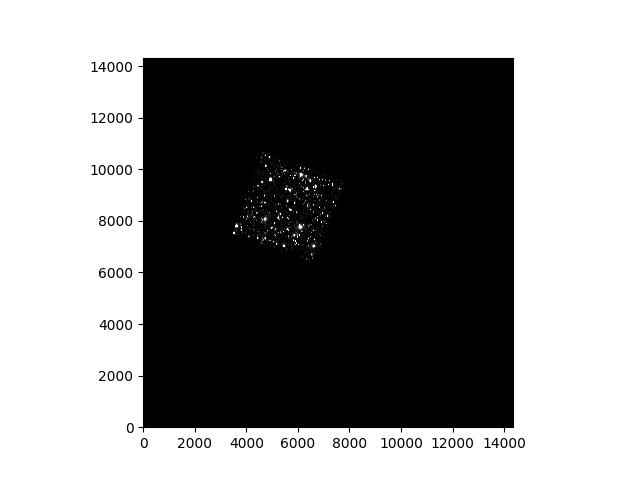

In [5]:
fig, ax = plt.subplots()
ax.imshow(hdu, vmin=0, vmax=0.1, origin='lower', cmap='gray')
plt.show()